### Linear Regression and Train/Test Split challenges


Ideally, try these with your own data! (Alternatively, there is the
`2013_movies.csv` data set.)





In [73]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline


#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [74]:
df = pd.read_csv('../../challenges_data/2013_movies.csv')

In [75]:
df['constant'] = 1
df = df.dropna()

In [76]:
X = df['constant']
y = df['DomesticTotalGross']

In [77]:
lm = sm.OLS(y,X)
fit1 = lm.fit()
fit1.summary()

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 31 Jan 2018   Prob (F-statistic):                nan
Time:                        09:49:57   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    1.035e+08   9.43e+06     10.975      0.000    8.48e+07    1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

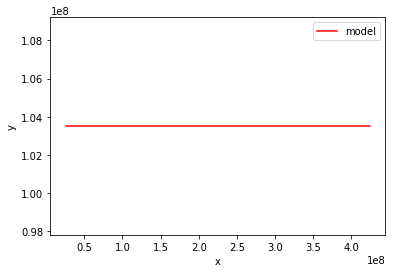

In [78]:
x_plot = np.linspace(0,1,87)
plt.plot(y, fit1.predict(X), color = 'red', label = 'model')
#ax.scatter(X, y, label='data',alpha=0.2)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

In [79]:
fit1.params

constant    1.035153e+08
dtype: float64

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [80]:
X = df[['constant','Budget']]
y = df['DomesticTotalGross']

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 2 columns):
constant    87 non-null int64
Budget      87 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [82]:
y.shape

(87,)

In [83]:
lm = sm.OLS(y,X)
fit2 = lm.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.19e-07
Time:                        09:50:04   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    4.443e+07    1.3e+07      3.418      0.001    1.86e+07    7.03e+07
Budget         0.7831      0.135      5.782      0.000       0.514       1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
X.shape

(87, 2)

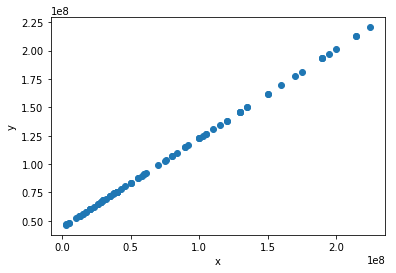

In [85]:
plt.scatter(X['Budget'], fit2.predict(X))
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

In [86]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.19e-07
Time:                        09:50:46   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    4.443e+07    1.3e+07      3.418      0.001    1.86e+07    7.03e+07
Budget         0.7831      0.135      5.782      0.000       0.514       1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residual')

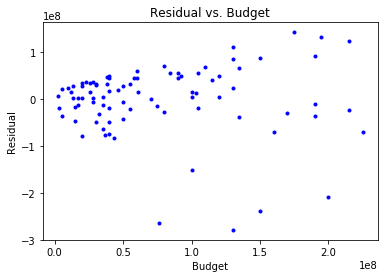

In [88]:
residual = fit2.predict(X) - y
## Plot of residuals vs. Budget
plt.plot(X['Budget'], residual, 'b.')
plt.title('Residual vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Residual')

#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [90]:
X['Rating'] = df['Rating']
X

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,constant,Budget,Rating
0,1,130000000.0,PG-13
1,1,200000000.0,PG-13
2,1,150000000.0,PG
3,1,76000000.0,PG
4,1,225000000.0,PG-13
5,1,100000000.0,PG-13
8,1,160000000.0,PG-13
9,1,215000000.0,PG
10,1,190000000.0,PG-13
11,1,170000000.0,PG-13


In [92]:
X=X.join(patsy.dmatrix('Rating',data=X,return_type='dataframe'))

ValueError: columns overlap but no suffix specified: Index(['Intercept', 'Rating[T.PG-13]', 'Rating[T.R]'], dtype='object')

In [94]:
X = X.drop(['Intercept','Rating'],axis=1)

In [95]:
lm = sm.OLS(y,X)
fit2 = lm.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     11.13
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           3.25e-06
Time:                        09:52:34   Log-Likelihood:                -1699.7
No. Observations:                  87   AIC:                             3407.
Df Residuals:                      83   BIC:                             3417.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant         5.773e+07   2.51e+07      2.303      0.024    7.88e+06    1.08e+08
Budget              0.7806      0.156      5.005      0.000       0.470       1.091
Rating[T.PG-13] -1.711e+07   2.35e+07     -0.728      0.468   -6.38e+07    2.96e+07
Rating[T.R]     -1.384e+07   2.57e+07     -0.539      0.591   -6.49e+07    3.72e+07
==============================================================================
Omnibus:                       36.518   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.882
Skew:                           1.529   Prob(JB):                     1.66e-18
Kurtosis:                       6.638   Cond. No.                     4.61e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.



#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

In [97]:
lr5 = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr5.fit(X_train, y_train)

lr5.score(X_test, y_test)

0.29462956707621724

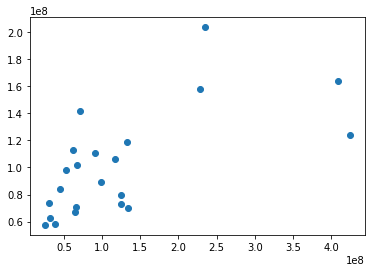

In [103]:
plt.scatter(y_test,lr5.predict(X_test))